In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Conjunto de dados

In [5]:
minutes_certificates = pd.read_csv(r'database\pre_minutes_and_certificates.csv')

In [6]:
minutes_certificates.head()

,student_id,certificates_issued,minutes_watched
0,4640,1,586.8000
1,5836,3,1903.1167
2,9754,1,702.7667
3,801,13,6066.0000
4,2022,1,115.3667


In [8]:
## Separando em variables e target
y = minutes_certificates["certificates_issued"].copy()
x = minutes_certificates["minutes_watched"].copy()

In [11]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365)

## Remodelando os inputs para numpy

In [12]:
# Converta X_train e X_test para matrizes NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)

# Verifique as formas originais dos conjuntos de treinamento e teste
print("Shape of X_train before reshaping:", X_train.shape)
print("Shape of X_test before reshaping:", X_test.shape)

# Remodele os conjuntos de treinamento e teste para terem uma única característica
# Suponha que seus dados tenham originalmente a forma (n_samples,)

# Remodelando os dados de treinamento
X_train = X_train.reshape(-1, 1)

# Remodelando os dados de teste
X_test = X_test.reshape(-1, 1)

# Verifique as formas dos conjuntos de treinamento e teste após a remodelagem
print("Shape of X_train after reshaping:", X_train.shape)
print("Shape of X_test after reshaping:", X_test.shape)

Shape of X_train before reshaping: (526,)
Shape of X_test before reshaping: (132,)
Shape of X_train after reshaping: (526, 1)
Shape of X_test after reshaping: (132, 1)


## Modelo - regressão linear

In [13]:
# Crie uma instância do modelo de regressão linear
model = LinearRegression()

# Treine o modelo nos dados de treinamento
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Obtenha o coeficiente angular (slope) do modelo
slope = model.coef_[0]

# Obtenha o intercepto y (y-intercept) do modelo
intercept = model.intercept_

# Imprima os valores do coeficiente angular (slope) e do intercepto y (y-intercept)
print("Slope (m):", slope)
print("Intercept (b):", intercept)

# Exiba a equação linear do modelo
print("Linear equation: y =", slope, "x +", intercept)


Slope (m): 0.001737848557308414
Intercept (b): 1.086468692665501
Linear equation: y = 0.001737848557308414 x + 1.086468692665501


In [15]:
# Calcule o R-quadrado dos dados de teste
r_squared = model.score(X_test, y_test)

print("R-squared:", r_squared)



R-squared: 0.202949731499372


In [16]:
# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

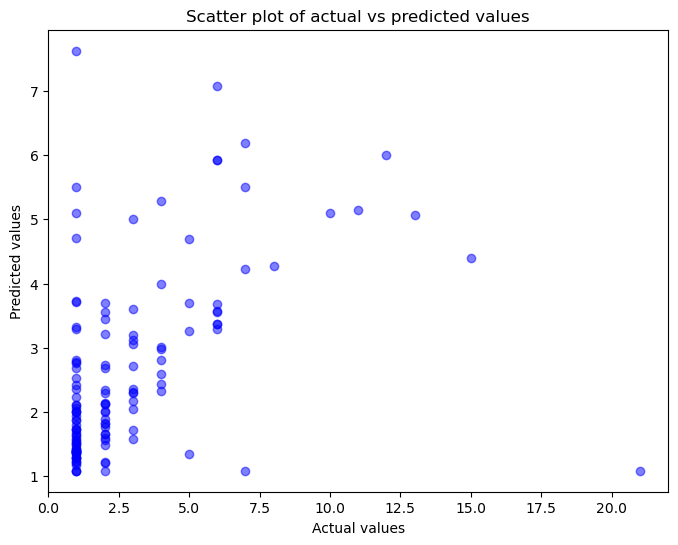

In [17]:
# Crie um gráfico de dispersão para visualizar as previsões do modelo
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Scatter plot of actual vs predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [23]:
# Faça a previsão para o exemplo único
dado_predict_unit = np.array([[1200]])
single_prediction = model.predict(dado_predict_unit)
print(single_prediction)

[3.17188696]
